# **Problem Statement**  : Home Loan Default
- Building a model to predict how capable each applicant is of repaying a loan, so that sanctioning loan only for the applicants who are likely to repay the loan.

# Domain Analysis
- 1) application_train: The main training data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating 0: the loan was repaid or 1: the loan was not repaid. Here we will use only the Training data.
- 2) bureau: In this dataset it consists of data concerning client’s previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
- 3) bureau_balance: It consists of monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
- 4) previous_application:The data of previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
- 5) POS_CASH_BALANCE: It consists of monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
- 6) credit_card_balance:The monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
- 7) installments_payment:The data of payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.

In [ ]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
%matplotlib inline
import seaborn as sns

In [ ]:
# seed ensures reproducibility
tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile

# Replace 'file_path.zip' with the path to your zip file
zip_path = '/content/drive/MyDrive/PRCP-1006-HomeLoanDef.zip'

# Replace 'extracted_folder' with the folder where you want to extract the contents
extracted_folder = '/content/extracted_folder'

# Create the folder if it doesn't exist
!mkdir -p $extracted_folder

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)


#### Loading application_train.csv main file

In [ ]:
import pandas as pd
application=pd.read_csv('/content/extracted_folder/Data/application_train.csv')

In [ ]:
application

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


- Has 307511 rows and 122 columns
- SK_ID_CURR is the unique code each row has
- the TARGET column represents the target for the ML model to be built

In [ ]:
application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [ ]:
application# Checking for null values
application.isnull().sum().sort_values(ascending=False)

COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_AVG     213514
NONLIVINGAPARTMENTS_MODE    213514
                             ...  
FLAG_DOCUMENT_15                 0
FLAG_DOCUMENT_16                 0
FLAG_DOCUMENT_17                 0
FLAG_DOCUMENT_18                 0
SK_ID_CURR                       0
Length: 122, dtype: int64

- There is a lot of null values and must be handled

In [ ]:
# Check for duplicated rows
application.duplicated().sum()

0

# EDA on application_train.csv file

In [ ]:
application['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

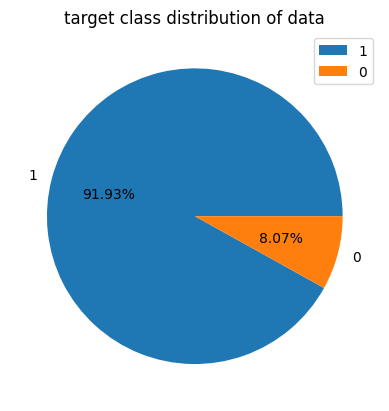

In [ ]:
# Check if data is balanced using a pie chart
import matplotlib.pyplot as plt
plt.pie(application['TARGET'].value_counts(),labels=application['TARGET'].unique(),autopct='%1.2f%%')
plt.legend()
plt.title('target class distribution of data')
plt.show()

- Observations:  The data is imbalanced 91.9% is Loan repayed-0  and 8.07% is Loan not repayed-1 and we need to handle this problem.

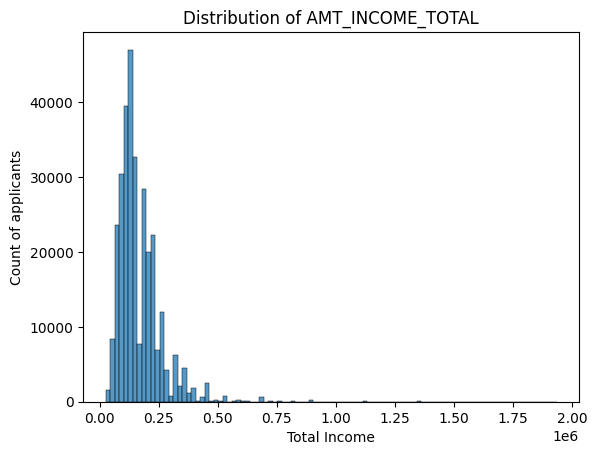

In [ ]:
#Distribution of AMT_INCOME_TOTAL.
import seaborn as sns

# Filtering data where 'AMT_INCOME_TOTAL' is less than 2,000,000
filtered_data = application[application['AMT_INCOME_TOTAL'] < 2000000]

# Plotting histogram using Seaborn
sns.histplot(data=filtered_data, x='AMT_INCOME_TOTAL', bins=100)
plt.xlabel('Total Income')
plt.ylabel('Count of applicants')
plt.title('Distribution of AMT_INCOME_TOTAL')
plt.show()


- distribution is skewed

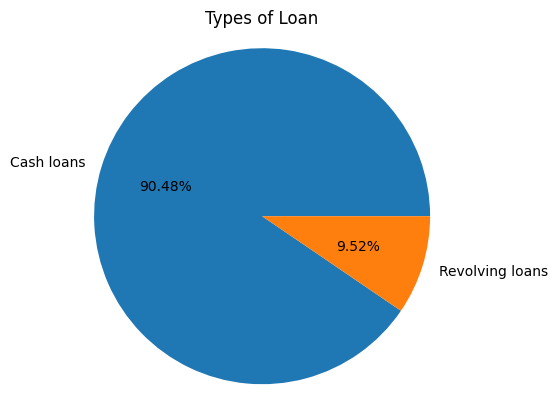

In [ ]:
#types of loan availiable
import matplotlib.pyplot as plt


contract_val = application['NAME_CONTRACT_TYPE'].value_counts()

# Create pie chart
plt.pie(contract_val, labels=contract_val.index, autopct='%1.2f%%')
plt.title('Types of Loan')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


- Many people are willing to take cash loan than revolving loan

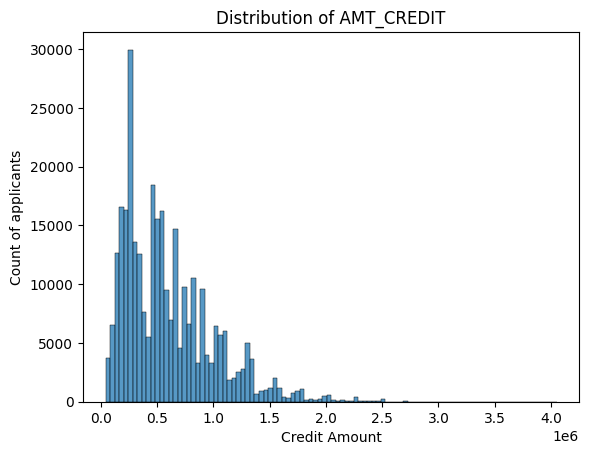

In [ ]:
#Distribution of AMT_CREDIT
sns.histplot(application['AMT_CREDIT'], bins=100)
plt.xlabel('Credit Amount')
plt.ylabel('Count of applicants')
plt.title('Distribution of AMT_CREDIT')
plt.show()


- We can see data is right skewed so, we can try to apply log transformation

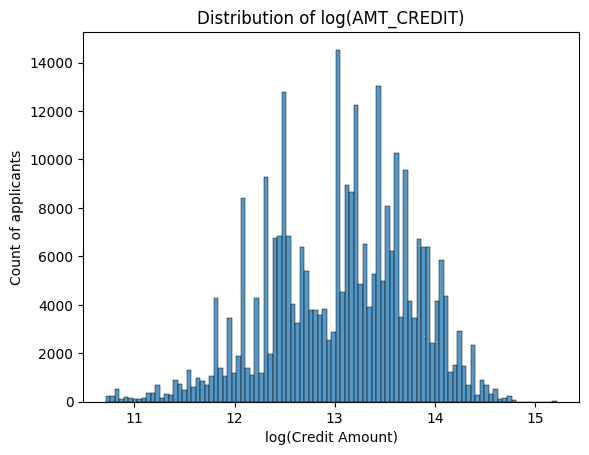

In [ ]:
import numpy as np
# #Distribution of log(AMT_CREDIT)
sns.histplot(np.log(application['AMT_CREDIT']), bins=100)
plt.xlabel('log(Credit Amount)')
plt.ylabel('Count of applicants')
plt.title('Distribution of log(AMT_CREDIT)')
plt.show()


- Originally the distribution is right skewed, we used log transformation to make it normal distributed.

In [ ]:
application['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

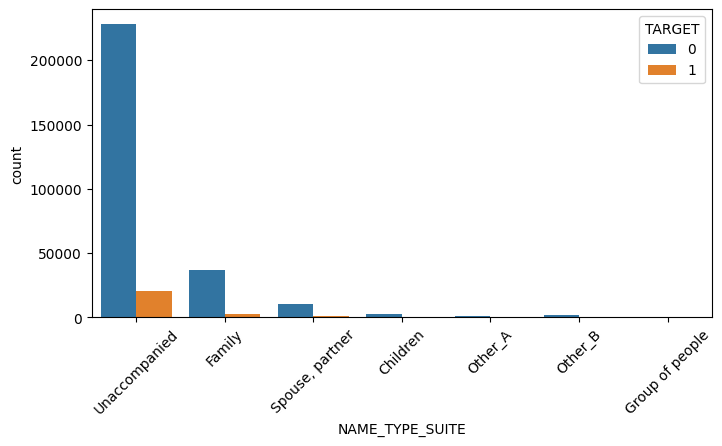

In [ ]:
# Distribution of Name of type of the Suite in terms of loan is repayed or not.
plt.figure(figsize=(8,4))
sns.countplot(x='NAME_TYPE_SUITE',data=application,hue='TARGET')
plt.xticks(rotation=45)
plt.show()

In [ ]:
application['NAME_INCOME_TYPE'].value_counts()

NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64

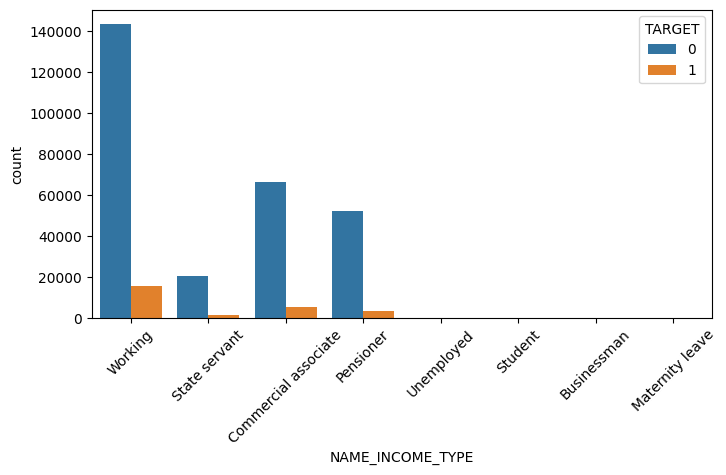

In [ ]:
# Distribution of Income sources of Applicants in terms of loan is repayed or not.
plt.figure(figsize=(8,4))
sns.countplot(x='NAME_INCOME_TYPE',data=application,hue='TARGET')
plt.xticks(rotation=45)
plt.show()

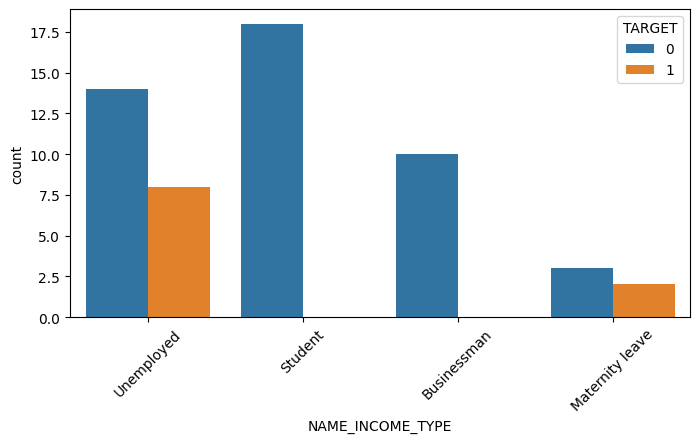

In [ ]:
# Count of 'Unemployed','Student', 'Businessman','Maternity leave' is very low , lets visualize it seperately
plt.figure(figsize=(8,4))
sns.countplot(x='NAME_INCOME_TYPE',data=application[application['NAME_INCOME_TYPE'].isin(['Unemployed','Student', 'Businessman','Maternity leave'])],hue='TARGET')
plt.xticks(rotation=45)
plt.show()

- All the Students and Businessman are repaying loan

In [ ]:
application['NAME_EDUCATION_TYPE'].value_counts()

NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: count, dtype: int64

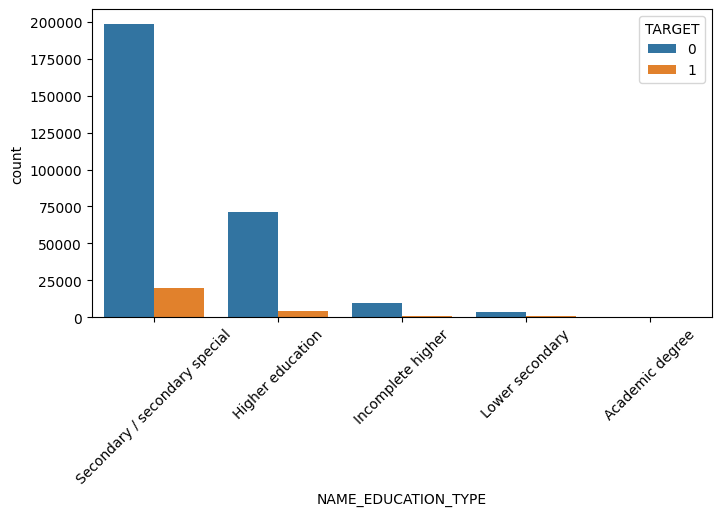

In [ ]:
# Distribution of Education of Applicants in terms of loan is repayed or not.
plt.figure(figsize=(8,4))
sns.countplot(x='NAME_EDUCATION_TYPE',data=application,hue='TARGET')
plt.xticks(rotation=45)
plt.show()

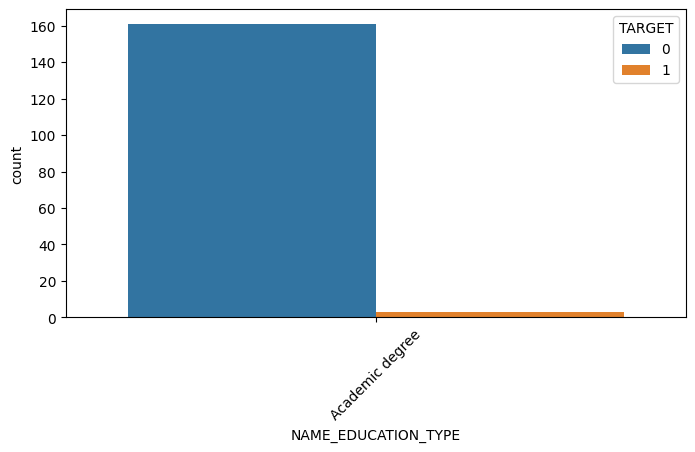

In [ ]:
# visualization of only acamedic degree since count is ver low
plt.figure(figsize=(8,4))
sns.countplot(x='NAME_EDUCATION_TYPE',data=application[application['NAME_EDUCATION_TYPE'].isin(['Academic degree'])],hue='TARGET')
plt.xticks(rotation=45)
plt.show()

- People with Academic Degree are more likely to repay the loan(Out of 164, only 3 applicants are not able to repay)

In [ ]:
application['NAME_FAMILY_STATUS'].unique()

array(['Single / not married', 'Married', 'Civil marriage', 'Widow',
       'Separated', 'Unknown'], dtype=object)

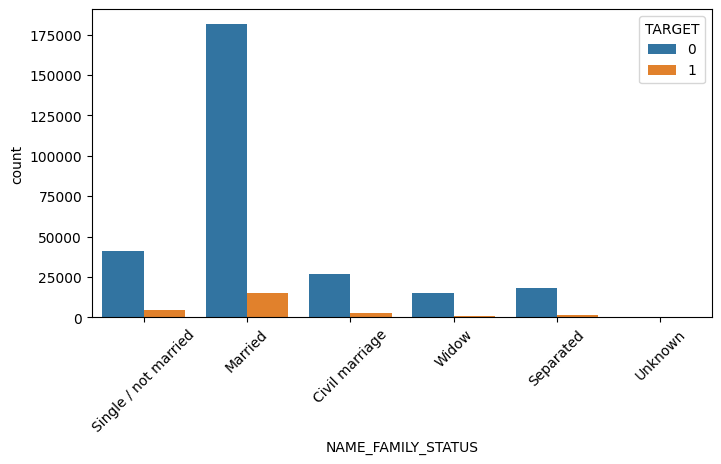

In [ ]:
# Distribution of Family status of Applicants in terms of loan is repayed or not.
plt.figure(figsize=(8,4))
sns.countplot(x='NAME_FAMILY_STATUS',data=application,hue='TARGET')
plt.xticks(rotation=45)
plt.show()

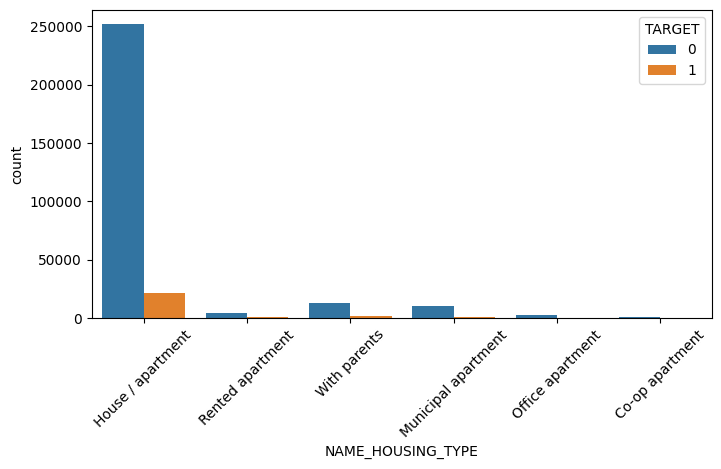

In [ ]:
# Distribution of Housing type of Applicants in terms of loan is repayed or not.

plt.figure(figsize=(8,4))
sns.countplot(x='NAME_HOUSING_TYPE',data=application,hue='TARGET')
plt.xticks(rotation=45)
plt.show()

In [ ]:
application['DAYS_BIRTH']/-365

0         25.920548
1         45.931507
2         52.180822
3         52.068493
4         54.608219
            ...    
307506    25.553425
307507    56.917808
307508    41.002740
307509    32.769863
307510    46.180822
Name: DAYS_BIRTH, Length: 307511, dtype: float64

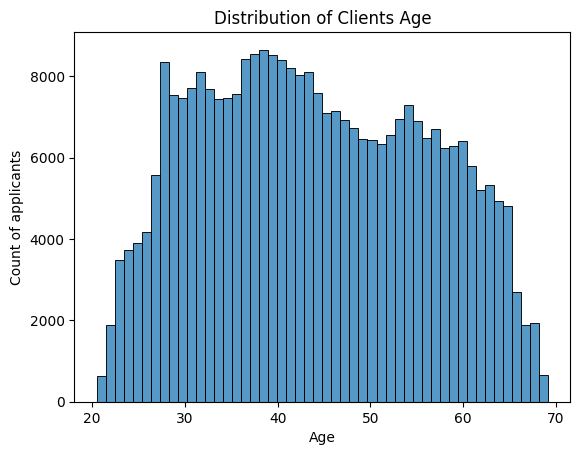

In [ ]:
# Distribution of Clients Age
sns.histplot(application['DAYS_BIRTH']/-365, bins=50)
plt.xlabel('Age')
plt.ylabel('Count of applicants')
plt.title('Distribution of Clients Age')
plt.show()

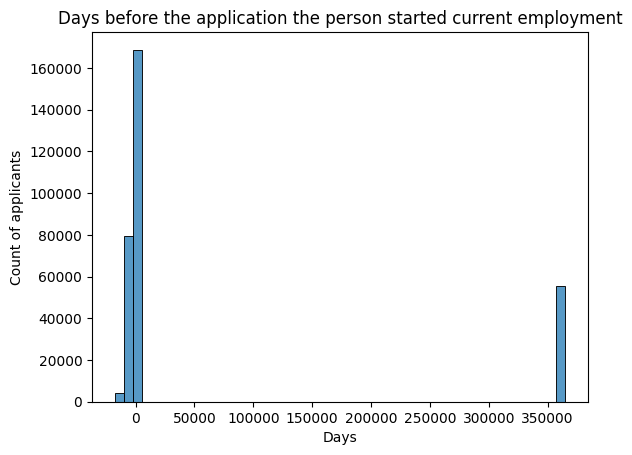

In [ ]:
# Distribution of years before the application the person started current employment.
sns.histplot(application['DAYS_EMPLOYED'], bins=50)
plt.xlabel('Days')
plt.ylabel('Count of applicants')
plt.title('Days before the application the person started current employment')
plt.show()

- we have almost 350k days of employement which is 1000+ years of employement
- This is not actually possible

In [ ]:
application[application['DAYS_EMPLOYED'] == 365243]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
23,100027,0,Cash loans,F,N,Y,0,83250.000,239850.0,23850.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
38,100045,0,Cash loans,F,N,Y,0,99000.000,247275.0,17338.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
43,100050,0,Cash loans,F,N,Y,0,108000.000,746280.0,42970.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307469,456209,0,Cash loans,F,N,Y,0,202500.000,703728.0,29943.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
307483,456227,0,Cash loans,F,N,Y,0,99000.000,247275.0,16479.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
307487,456231,0,Cash loans,M,N,Y,0,117000.000,1071909.0,31473.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,8.0
307505,456249,0,Cash loans,F,N,Y,0,112500.000,225000.0,22050.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0


- All these columns are errors in DAYS_EMPLOYED

In [ ]:
# Creating a flag column for error
application['DAYS_EMPLOYED_ERROR'] = application["DAYS_EMPLOYED"] == 365243

# Replace the error values with nan
application['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

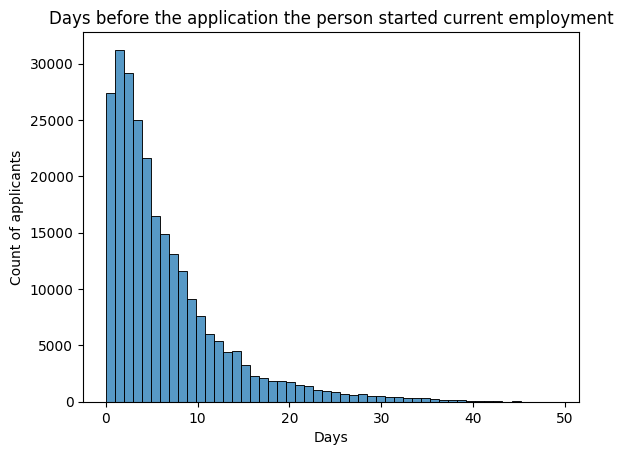

In [ ]:
# Correct Distribution of years before the application the person started current employment.
sns.histplot(application['DAYS_EMPLOYED']/-365, bins=50)
plt.xlabel('Days')
plt.ylabel('Count of applicants')
plt.title('Days before the application the person started current employment')
plt.show()

-  The applicants with less than 2 years of employment are less likely to repay the loan.

# **Data Preparation:**
## Feature Engineering of Application data:

In [ ]:
# Flag to represent when Total income is greater than Credit
application['INCOME_GT_CREDIT_FLAG'] = application['AMT_INCOME_TOTAL'] > application['AMT_CREDIT']
# Column to represent Credit Income Percent
application['CREDIT_INCOME_PERCENT'] = application['AMT_CREDIT'] / application['AMT_INCOME_TOTAL']
# Column to represent Annuity Income percent
application['ANNUITY_INCOME_PERCENT'] = application['AMT_ANNUITY'] / application['AMT_INCOME_TOTAL']
# Column to represent Credit Term
application['CREDIT_TERM'] = application['AMT_CREDIT'] / application['AMT_ANNUITY']
# Column to represent Days Employed percent in his life
application['DAYS_EMPLOYED_PERCENT'] = application['DAYS_EMPLOYED'] / application['DAYS_BIRTH']
# Shape of Application data
print("The shape of application data:",application.shape)

The shape of application data: (307511, 128)


# Using bureau_balance

In [ ]:
bureau_balance = pd.read_csv('/content/extracted_folder/Data/bureau_balance.csv')

In [ ]:
bureau_balance

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
...,...,...,...
27299920,5041336,-47,X
27299921,5041336,-48,X
27299922,5041336,-49,X
27299923,5041336,-50,X


### Using Bureau Data:

In [ ]:
bureau = pd.read_csv('/content/extracted_folder/Data/bureau.csv')

In [ ]:
bureau

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,0,-30.0,NaN,0.0,0,11250.00,11250.0,0.0,0.0,Microloan,-19,NaN
1716424,100044,5057754,Closed,currency 1,-2648,0,-2433.0,-2493.0,5476.5,0,38130.84,0.0,0.0,0.0,Consumer credit,-2493,NaN
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.0,-970.0,NaN,0,15570.00,NaN,NaN,0.0,Consumer credit,-967,NaN
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.0,-1513.0,NaN,0,36000.00,0.0,0.0,0.0,Consumer credit,-1508,NaN


# combining bureau and bureau balance

In [ ]:
# Joining Bureau_balance data to bureau data
# Select numerical columns
bureau_bal_numeric = bureau_balance.select_dtypes(include='number')

# Group by
grp = bureau_bal_numeric.groupby('SK_ID_BUREAU').mean()

# Reset index
grp.reset_index(inplace=True)


In [ ]:
grp.columns = ['BUREAU_BALANCE_'+column if column !='SK_ID_BUREAU' else column for column in grp.columns]
bureau = bureau.merge(grp, on='SK_ID_BUREAU', how='left')
bureau.update(bureau[grp.columns].fillna(0))

In [ ]:
# Combining categorical features

bureau_bal_categorical = pd.get_dummies(bureau_balance.select_dtypes('object'))
bureau_bal_categorical['SK_ID_BUREAU'] = bureau_balance['SK_ID_BUREAU']

In [ ]:
grp = bureau_bal_categorical.groupby(by = ['SK_ID_BUREAU']).mean().reset_index()

In [ ]:
grp.columns = ['BUREAU_BALANCE_'+column if column !='SK_ID_BUREAU' else column for column in grp.columns]
bureau = bureau.merge(grp, on='SK_ID_BUREAU', how='left')
bureau.update(bureau[grp.columns].fillna(0))

In [ ]:
bureau

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,...,AMT_ANNUITY,BUREAU_BALANCE_MONTHS_BALANCE,BUREAU_BALANCE_STATUS_0,BUREAU_BALANCE_STATUS_1,BUREAU_BALANCE_STATUS_2,BUREAU_BALANCE_STATUS_3,BUREAU_BALANCE_STATUS_4,BUREAU_BALANCE_STATUS_5,BUREAU_BALANCE_STATUS_C,BUREAU_BALANCE_STATUS_X
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,0,-30.0,NaN,0.0,0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1716424,100044,5057754,Closed,currency 1,-2648,0,-2433.0,-2493.0,5476.5,0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.0,-970.0,NaN,0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.0,-1513.0,NaN,0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Joining Bureau data to Application data
# Select numerical columns
bureau_numeric = bureau.select_dtypes(include='number')

# Group by 'SK_ID_CURR' and calculate the mean for each numerical feature
grp = bureau_numeric.drop(['SK_ID_BUREAU'], axis = 1).groupby('SK_ID_CURR').mean()

# Reset index
grp.reset_index(inplace=True)


In [ ]:
grp.columns = ['BUREAU_'+column if column !='SK_ID_CURR' else column for column in grp.columns]
application_bureau = application.merge(grp, on='SK_ID_CURR', how='left')
application_bureau.update(application_bureau[grp.columns].fillna(0))

In [ ]:
# Combining categorical features

bureau_categorical = pd.get_dummies(bureau.select_dtypes('object'))
bureau_categorical['SK_ID_CURR'] = bureau['SK_ID_CURR']

In [ ]:
grp = bureau_categorical.groupby(by = ['SK_ID_CURR']).mean().reset_index()

In [ ]:
grp.columns = ['BUREAU_'+column if column !='SK_ID_CURR' else column for column in grp.columns]
application_bureau = application_bureau.merge(grp, on='SK_ID_CURR', how='left')
application_bureau.update(application_bureau[grp.columns].fillna(0))

In [ ]:
application_bureau.shape

(307511, 172)

In [ ]:
application_bureau

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,BUREAU_CREDIT_TYPE_Interbank credit,BUREAU_CREDIT_TYPE_Loan for business development,BUREAU_CREDIT_TYPE_Loan for purchase of shares (margin lending),BUREAU_CREDIT_TYPE_Loan for the purchase of equipment,BUREAU_CREDIT_TYPE_Loan for working capital replenishment,BUREAU_CREDIT_TYPE_Microloan,BUREAU_CREDIT_TYPE_Mobile operator loan,BUREAU_CREDIT_TYPE_Mortgage,BUREAU_CREDIT_TYPE_Real estate loan,BUREAU_CREDIT_TYPE_Unknown type of loan
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Number of past loans per customer
grp = bureau.groupby(by = ['SK_ID_CURR'])['SK_ID_BUREAU'].count().reset_index().rename(columns = {'SK_ID_BUREAU': 'BUREAU_LOAN_COUNT'})
application_bureau = application_bureau.merge(grp, on='SK_ID_CURR', how='left')

In [ ]:
application_bureau['BUREAU_LOAN_COUNT'] = application_bureau['BUREAU_LOAN_COUNT'].fillna(0)

In [ ]:
# Number of types of past loans per customer
grp = bureau[['SK_ID_CURR', 'CREDIT_TYPE']].groupby(by = ['SK_ID_CURR'])['CREDIT_TYPE'].nunique().reset_index().rename(columns={'CREDIT_TYPE': 'BUREAU_LOAN_TYPES'})
application_bureau = application_bureau.merge(grp, on='SK_ID_CURR', how='left')

In [ ]:
application_bureau['BUREAU_LOAN_TYPES'] = application_bureau['BUREAU_LOAN_TYPES'].fillna(0)

In [ ]:
# Debt over credit ratio
bureau['AMT_CREDIT_SUM'] = bureau['AMT_CREDIT_SUM'].fillna(0)
bureau['AMT_CREDIT_SUM_DEBT'] = bureau['AMT_CREDIT_SUM_DEBT'].fillna(0)

In [ ]:
grp1 = bureau[['SK_ID_CURR','AMT_CREDIT_SUM']].groupby(by=['SK_ID_CURR'])['AMT_CREDIT_SUM'].sum().reset_index().rename(columns={'AMT_CREDIT_SUM': 'TOTAL_CREDIT_SUM'})

In [ ]:
grp2 = bureau[['SK_ID_CURR','AMT_CREDIT_SUM_DEBT']].groupby(by=['SK_ID_CURR'])['AMT_CREDIT_SUM_DEBT'].sum().reset_index().rename(columns={'AMT_CREDIT_SUM_DEBT':'TOTAL_CREDIT_SUM_DEBT'})

In [ ]:
grp1['DEBT_CREDIT_RATIO'] = grp2['TOTAL_CREDIT_SUM_DEBT']/grp1['TOTAL_CREDIT_SUM']
del grp1['TOTAL_CREDIT_SUM']

In [ ]:
application_bureau = application_bureau.merge(grp1, on='SK_ID_CURR', how='left')

In [ ]:
application_bureau['DEBT_CREDIT_RATIO'] = application_bureau['DEBT_CREDIT_RATIO'].fillna(0)
application_bureau['DEBT_CREDIT_RATIO'].replace([np.inf, -np.inf], 0, inplace=True)
application_bureau['DEBT_CREDIT_RATIO'] = pd.to_numeric(application_bureau['DEBT_CREDIT_RATIO'], downcast='float')

In [ ]:
# Overdue over debt ratio
bureau['AMT_CREDIT_SUM_OVERDUE'] = bureau['AMT_CREDIT_SUM_OVERDUE'].fillna(0)
bureau['AMT_CREDIT_SUM_DEBT'] = bureau['AMT_CREDIT_SUM_DEBT'].fillna(0)

In [ ]:
grp1 = bureau[['SK_ID_CURR','AMT_CREDIT_SUM_OVERDUE']].groupby(by=['SK_ID_CURR'])['AMT_CREDIT_SUM_OVERDUE'].sum().reset_index().rename(columns={'AMT_CREDIT_SUM_OVERDUE': 'TOTAL_CUSTOMER_OVERDUE'})
grp2 = bureau[['SK_ID_CURR','AMT_CREDIT_SUM_DEBT']].groupby(by=['SK_ID_CURR'])['AMT_CREDIT_SUM_DEBT'].sum().reset_index().rename(columns={'AMT_CREDIT_SUM_DEBT':'TOTAL_CUSTOMER_DEBT'})

In [ ]:
grp1['OVERDUE_DEBT_RATIO'] = grp1['TOTAL_CUSTOMER_OVERDUE']/grp2['TOTAL_CUSTOMER_DEBT']
del grp1['TOTAL_CUSTOMER_OVERDUE']

In [ ]:
application_bureau = application_bureau.merge(grp1, on='SK_ID_CURR', how='left')

In [ ]:
application_bureau['OVERDUE_DEBT_RATIO'] = application_bureau['OVERDUE_DEBT_RATIO'].fillna(0)
application_bureau.replace([np.inf, -np.inf], 0,inplace=True)

In [ ]:
application_bureau['OVERDUE_DEBT_RATIO'] = pd.to_numeric(application_bureau['OVERDUE_DEBT_RATIO'], downcast='float')

# Using Previous Application Data

In [ ]:
previous_applicaton = pd.read_csv('/content/extracted_folder/Data/previous_application.csv')

In [ ]:
previous_applicaton

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


### Joining Previous Application data to Application Bureau data:

In [ ]:
# Number of previous applications per customer
grp = previous_applicaton[['SK_ID_CURR','SK_ID_PREV']].groupby(by=['SK_ID_CURR'])['SK_ID_PREV'].count().reset_index().rename(columns={'SK_ID_PREV':'PREV_APP_COUNT'})
application_bureau_prev = application_bureau.merge(grp, on =['SK_ID_CURR'], how = 'left')
application_bureau_prev['PREV_APP_COUNT'] = application_bureau_prev['PREV_APP_COUNT'].fillna(0)

In [ ]:
# Select numerical columns
prev_numeric = previous_applicaton.select_dtypes(include='number')

# Group by 'SK_ID_CURR' and calculate the mean for each numerical feature
grp = prev_numeric.drop(['SK_ID_PREV'], axis = 1).groupby('SK_ID_CURR').mean()

# Reset index
grp.reset_index(inplace=True)

In [ ]:
# Combining categorical features
prev_categorical = pd.get_dummies(previous_applicaton.select_dtypes('object'))
prev_categorical['SK_ID_CURR'] = previous_applicaton['SK_ID_CURR']
prev_categorical.head()

,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Consumer loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_CONTRACT_TYPE_XNA,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,...,PRODUCT_COMBINATION_Cash X-Sell: middle,PRODUCT_COMBINATION_POS household with interest,PRODUCT_COMBINATION_POS household without interest,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_POS industry without interest,PRODUCT_COMBINATION_POS mobile with interest,PRODUCT_COMBINATION_POS mobile without interest,PRODUCT_COMBINATION_POS other with interest,PRODUCT_COMBINATION_POS others without interest,SK_ID_CURR
0,False,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,271877
1,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,108129
2,True,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,122040
3,True,False,False,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,176158
4,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,202054


In [ ]:
grp = prev_categorical.groupby('SK_ID_CURR').mean().reset_index()
grp.columns = ['PREV_'+column if column != 'SK_ID_CURR' else column for column in grp.columns]

In [ ]:
application_bureau_prev = application_bureau_prev.merge(grp, on=['SK_ID_CURR'], how='left')
application_bureau_prev.update(application_bureau_prev[grp.columns].fillna(0))

# Using POS_CASH_balance data:

In [ ]:
pos_cash = pd.read_csv('/content/extracted_folder/Data/POS_CASH_balance.csv')

In [ ]:
pos_cash

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0
...,...,...,...,...,...,...,...,...
10001353,2448283,226558,-20,6.0,0.0,Active,843,0
10001354,1717234,141565,-19,12.0,0.0,Active,602,0
10001355,1283126,315695,-21,10.0,0.0,Active,609,0
10001356,1082516,450255,-22,12.0,0.0,Active,614,0


### Joining POS_CASH_balance data to application_bureau_prev_data:

In [ ]:
# Combining numerical features
# Select numerical columns
pos_numeric = pos_cash.select_dtypes(include='number')

# Group by 'SK_ID_CURR' and calculate the mean for each numerical feature
grp = pos_numeric.drop(['SK_ID_PREV'], axis = 1).groupby('SK_ID_CURR').mean()

# Reset index
grp.reset_index(inplace=True)


In [ ]:
prev_columns = ['POS_'+column if column != 'SK_ID_CURR' else column for column in grp.columns ]

In [ ]:
grp.columns = prev_columns
application_bureau_prev = application_bureau_prev.merge(grp, on =['SK_ID_CURR'], how = 'left')

In [ ]:
application_bureau_prev.update(application_bureau_prev[grp.columns].fillna(0))

In [ ]:
# Combining categorical features
pos_cash_categorical = pd.get_dummies(pos_cash.select_dtypes('object'))
pos_cash_categorical['SK_ID_CURR'] = pos_cash['SK_ID_CURR']


In [ ]:
grp = pos_cash_categorical.groupby('SK_ID_CURR').mean().reset_index()
grp.columns = ['POS_'+column if column != 'SK_ID_CURR' else column for column in grp.columns]

In [ ]:
application_bureau_prev = application_bureau_prev.merge(grp, on=['SK_ID_CURR'], how='left')
application_bureau_prev.update(application_bureau_prev[grp.columns].fillna(0))

# Using installments_payments data:

In [ ]:
insta_payments = pd.read_csv('/content/extracted_folder/Data/installments_payments.csv')

In [ ]:
insta_payments
insta_payments

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585
...,...,...,...,...,...,...,...,...
13605396,2186857,428057,0.0,66,-1624.0,NaN,67.500,NaN
13605397,1310347,414406,0.0,47,-1539.0,NaN,67.500,NaN
13605398,1308766,402199,0.0,43,-7.0,NaN,43737.435,NaN
13605399,1062206,409297,0.0,43,-1986.0,NaN,67.500,NaN


In [ ]:
insta_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


### combining with main data

In [ ]:
# Combining numerical features and there are no categorical features in this dataset
grp = insta_payments.drop('SK_ID_PREV', axis =1).groupby(by=['SK_ID_CURR']).mean().reset_index()

In [ ]:
prev_columns = ['INSTA_'+column if column != 'SK_ID_CURR' else column for column in grp.columns ]

In [ ]:
grp.columns = prev_columns

In [ ]:
application_bureau_prev = application_bureau_prev.merge(grp, on =['SK_ID_CURR'], how = 'left')

In [ ]:
application_bureau_prev.update(application_bureau_prev[grp.columns].fillna(0))

# Using Credit card balance data:

In [ ]:
credit_card = pd.read_csv('/content/extracted_folder/Data/credit_card_balance.csv')

In [ ]:
credit_card

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840307,1036507,328243,-9,0.000,45000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
3840308,1714892,347207,-9,0.000,45000,0.0,0.0,0.0,0.0,0.000,...,0.000,0.000,0.0,0,0.0,0.0,23.0,Active,0,0
3840309,1302323,215757,-9,275784.975,585000,270000.0,270000.0,0.0,0.0,2250.000,...,273093.975,273093.975,2.0,2,0.0,0.0,18.0,Active,0,0
3840310,1624872,430337,-10,0.000,450000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0


In [ ]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

### combining with main data

In [ ]:
# Select numerical columns
credit_numeric = credit_card.select_dtypes(include='number')

# Group by 'SK_ID_CURR' and calculate the mean for each numerical feature
grp = credit_numeric.drop(['SK_ID_PREV'], axis = 1).groupby('SK_ID_CURR').mean()

# Reset index
grp.reset_index(inplace=True)


In [ ]:
prev_columns = ['CREDIT_'+column if column != 'SK_ID_CURR' else column for column in grp.columns ]

In [ ]:
grp.columns = prev_columns
application_bureau_prev = application_bureau_prev.merge(grp, on =['SK_ID_CURR'], how = 'left')

In [ ]:
application_bureau_prev.update(application_bureau_prev[grp.columns].fillna(0))

In [ ]:
# Combining categorical features
credit_categorical = pd.get_dummies(credit_card.select_dtypes('object'))
credit_categorical['SK_ID_CURR'] = credit_card['SK_ID_CURR']

In [ ]:
grp = credit_categorical.groupby('SK_ID_CURR').mean().reset_index()
grp.columns = ['CREDIT_'+column if column != 'SK_ID_CURR' else column for column in grp.columns]

In [ ]:
application_bureau_prev = application_bureau_prev.merge(grp, on=['SK_ID_CURR'], how='left')
application_bureau_prev.update(application_bureau_prev[grp.columns].fillna(0))

In [ ]:
application_bureau_prev.shape

(307511, 367)

In [ ]:
application_bureau_prev

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,CREDIT_CNT_INSTALMENT_MATURE_CUM,CREDIT_SK_DPD,CREDIT_SK_DPD_DEF,CREDIT_NAME_CONTRACT_STATUS_Active,CREDIT_NAME_CONTRACT_STATUS_Approved,CREDIT_NAME_CONTRACT_STATUS_Completed,CREDIT_NAME_CONTRACT_STATUS_Demand,CREDIT_NAME_CONTRACT_STATUS_Refused,CREDIT_NAME_CONTRACT_STATUS_Sent proposal,CREDIT_NAME_CONTRACT_STATUS_Signed
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Dividing the data for model creation

In [ ]:
X=application_bureau_prev.drop(['TARGET','SK_ID_CURR'],axis=1)
y=application_bureau_prev['TARGET']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,stratify=y)

In [ ]:
X_train.shape

(230633, 365)

In [ ]:
X_test.shape

(76878, 365)

In [ ]:
# Seperation of columns into numeric and categorical columns
types = np.array([dt for dt in X_train.dtypes])

In [ ]:
types

array([dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('int64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('O'), dtype('O'), dtype('O'), dtype('O'),
       dtype('O'), dtype('float64'), dtype('int64'), dtype('float64'),
       dtype('float64'), dtype('int64'), dtype('float64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('O'), dtype('float64'), dtype('int64'),
       dtype('int64'), dtype('O'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('O'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float6

In [ ]:
all_columns = X_train.columns.values
is_num = types != 'object'

In [ ]:
num_cols = all_columns[is_num]
cat_cols = all_columns[~is_num]

In [ ]:
from sklearn.impute import SimpleImputer
# Featurization of numeric data
imputer_num = SimpleImputer(strategy='median')
X_train_num = imputer_num.fit_transform(X_train[num_cols])
X_test_num = imputer_num.transform(X_test[num_cols])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler_num = StandardScaler()
X_train_num1 = scaler_num.fit_transform(X_train_num)
X_test_num1 = scaler_num.transform(X_test_num)

In [ ]:
X_train_num_final = pd.DataFrame(X_train_num1, columns=num_cols)
X_test_num_final = pd.DataFrame(X_test_num1, columns=num_cols)

In [ ]:
# Featurization of categorical data
imputer_cat = SimpleImputer(strategy='constant', fill_value='MISSING')
X_train_cat = imputer_cat.fit_transform(X_train[cat_cols])
X_test_cat = imputer_cat.transform(X_test[cat_cols])

In [ ]:
X_train_cat1= pd.DataFrame(X_train_cat, columns=cat_cols)
X_test_cat1= pd.DataFrame(X_test_cat, columns=cat_cols)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False,handle_unknown='ignore')
X_train_cat2 = ohe.fit_transform(X_train_cat1)
X_test_cat2 = ohe.transform(X_test_cat1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
cat_cols_ohe = ohe.get_feature_names_out(input_features=cat_cols)


In [ ]:
X_train_cat_final = pd.DataFrame(X_train_cat2, columns = cat_cols_ohe)
X_test_cat_final = pd.DataFrame(X_test_cat2, columns = cat_cols_ohe)

In [ ]:
# Final complete data
X_train_final = pd.concat([X_train_num_final,X_train_cat_final], axis = 1)
X_test_final = pd.concat([X_test_num_final,X_test_cat_final], axis = 1)

In [ ]:
print(X_train_final.shape)
print(X_test_final.shape)

(230633, 495)
(76878, 495)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Instantiate and train the logistic regression model (m1)
m1 = LogisticRegression()
m1.fit(X_train_final, y_train)

# Predict probabilities on the test set for logistic regression (m1)
y_pred_proba_m1 = m1.predict_proba(X_test_final)[:, 1]

# Calculate ROC-AUC score for logistic regression (m1)
roc_auc_m1 = roc_auc_score(y_test, y_pred_proba_m1)

print("Logistic Regression (m1) ROC-AUC Score:", roc_auc_m1)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression (m1) ROC-AUC Score: 0.7666543031198638


In [ ]:
# Predict probabilities on the train set for logistic regression (m1)
y_train_pred_proba_m1 = m1.predict_proba(X_train_final)[:, 1]

# Calculate train ROC-AUC score for logistic regression (m1)
train_roc_auc_m1 = roc_auc_score(y_train, y_train_pred_proba_m1)
print("Train ROC-AUC score for logistic regression (m1):", train_roc_auc_m1)


Train ROC-AUC score for logistic regression (m1): 0.770998065482476


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

# Instantiate and train the decision tree model (m2)
m2 = DecisionTreeClassifier()
m2.fit(X_train_final, y_train)

# Predict probabilities on the test set for decision tree (m2)
y_pred_proba_m2 = m2.predict_proba(X_test_final)[:, 1]

# Calculate ROC-AUC score for decision tree (m2)
roc_auc_m2 = roc_auc_score(y_test, y_pred_proba_m2)

print("Decision Tree (m2) ROC-AUC Score:", roc_auc_m2)


Decision Tree (m2) ROC-AUC Score: 0.5434276436746345


In [ ]:
# Predict probabilities on the train set for decision tree (m2)
y_train_pred_proba_m2 = m2.predict_proba(X_train_final)[:, 1]

# Calculate train ROC-AUC score for decision tree (m2)
train_roc_auc_m2 = roc_auc_score(y_train, y_train_pred_proba_m2)

# Print train ROC-AUC score for decision tree (m2)
print("Train ROC-AUC score for Decision Tree (m2):", train_roc_auc_m2)


Train ROC-AUC score for Decision Tree (m2): 1.0


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

# Instantiate and train the Gradient Boosting model (m3)
m3 = GradientBoostingClassifier()
m3.fit(X_train_final, y_train)

# Predict probabilities on the test set for Gradient Boosting (m3)
y_pred_proba_m3 = m3.predict_proba(X_test_final)[:, 1]

# Calculate ROC-AUC score for Gradient Boosting (m3)
roc_auc_m3 = roc_auc_score(y_test, y_pred_proba_m3)

print("Gradient Boosting (m3) ROC-AUC Score:", roc_auc_m3)



Gradient Boosting (m3) ROC-AUC Score: 0.7714482015877628


In [ ]:
# Predict probabilities on the train set for Gradient Boosting (m3)
y_train_pred_proba_m3 = m3.predict_proba(X_train_final)[:, 1]

# Calculate train ROC-AUC score for Gradient Boosting (m3)
train_roc_auc_m3 = roc_auc_score(y_train, y_train_pred_proba_m3)

# Print train ROC-AUC score for Gradient Boosting (m3)
print("Train ROC-AUC score for Gradient Boosting (m3):", train_roc_auc_m3)


Train ROC-AUC score for Gradient Boosting (m3): 0.7784827945089279


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate and train the Random Forest model (m4)
m4 = RandomForestClassifier()
m4.fit(X_train_final, y_train)

# Predict probabilities on the test set for Random Forest (m4)
y_pred_proba_m4 = m4.predict_proba(X_test_final)[:, 1]

# Calculate ROC-AUC score for Random Forest (m4)
roc_auc_m4 = roc_auc_score(y_test, y_pred_proba_m4)

print("Random Forest (m4) ROC-AUC Score:", roc_auc_m4)


Random Forest (m4) ROC-AUC Score: 0.7263294836308695


In [ ]:
# Predict probabilities on the train set for Random Forest (m4)
y_train_pred_proba_m4 = m4.predict_proba(X_train_final)[:, 1]

# Calculate train ROC-AUC score for Random Forest (m4)
train_roc_auc_m4 = roc_auc_score(y_train, y_train_pred_proba_m4)

# Print train ROC-AUC score for Random Forest (m4)
print("Train ROC-AUC score for Random Forest (m4):", train_roc_auc_m4)


Train ROC-AUC score for Random Forest (m4): 1.0


In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb

# Instantiate and train the XGBoost model (m5)
m5 = xgb.XGBClassifier()
m5.fit(X_train_final, y_train)

# Predict probabilities on the test set for XGBoost (m5)
y_pred_proba_m5 = m5.predict_proba(X_test_final)[:, 1]

# Calculate ROC-AUC score for XGBoost (m5)
roc_auc_m5 = roc_auc_score(y_test, y_pred_proba_m5)

print("XGBoost (m5) ROC-AUC Score:", roc_auc_m5)


XGBoost (m5) ROC-AUC Score: 0.7700892332735613


In [ ]:
# Predict probabilities on the train set for XGBoost (m5)
y_train_pred_proba_m5 = m5.predict_proba(X_train_final)[:, 1]

# Calculate train ROC-AUC score for XGBoost (m5)
train_roc_auc_m5 = roc_auc_score(y_train, y_train_pred_proba_m5)

# Print train ROC-AUC score for XGBoost (m5)
print("Train ROC-AUC score for XGBoost (m5):", train_roc_auc_m5)


Train ROC-AUC score for XGBoost (m5): 0.8874962340423854


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Instantiate and train the Naive Bayes model (m6)
m6 = GaussianNB()
m6.fit(X_train_final, y_train)

# Predict probabilities on the test set for Naive Bayes (m6)
y_pred_proba_m6 = m6.predict_proba(X_test_final)[:, 1]

# Calculate ROC-AUC score for Naive Bayes (m6)
roc_auc_m6 = roc_auc_score(y_test, y_pred_proba_m6)

print("Naive Bayes (m6) ROC-AUC Score:", roc_auc_m6)

Naive Bayes (m6) ROC-AUC Score: 0.5117408341000929


In [ ]:
# Predict probabilities on the train set for Naive Bayes (m6)
y_train_pred_proba_m6 = m6.predict_proba(X_train_final)[:, 1]

# Calculate train ROC-AUC score for Naive Bayes (m6)
train_roc_auc_m6 = roc_auc_score(y_train, y_train_pred_proba_m6)

# Print train ROC-AUC score for Naive Bayes (m6)
print("Train ROC-AUC score for Naive Bayes (m6):", train_roc_auc_m6)


Train ROC-AUC score for Naive Bayes (m6): 0.5142829211862263


# Model Comparison

In [ ]:
import pandas as pd

df = pd.DataFrame({
    'Algorithm': ['Logistic Regression', 'Decision Trees', 'Gradient Boosting', 'Random Forest', 'XGBoost', 'GaussianNB'],
    'Train_AUC_score': [train_roc_auc_m1, train_roc_auc_m2, train_roc_auc_m3, train_roc_auc_m4, train_roc_auc_m5, train_roc_auc_m6],
    'Test_AUC_score': [roc_auc_m1, roc_auc_m2, roc_auc_m3, roc_auc_m4, roc_auc_m5, roc_auc_m6]
})

df.sort_values(by='Test_AUC_score', ascending=False,ignore_index=True)

,Algorithm,Train_AUC_score,Test_AUC_score
0,Gradient Boosting,0.778483,0.771448
1,XGBoost,0.887496,0.770089
2,Logistic Regression,0.770998,0.766654
3,Random Forest,1.000000,0.726329
4,Decision Trees,1.000000,0.543428
5,GaussianNB,0.514283,0.511741


#  Conclusion
- Gradient Boosting model performs the best as it has the best Test_AUC_score.
- We can conclude m3 has the best model, AUC score indicates the model has a better capability to seperate the two classes.